<a href="https://colab.research.google.com/github/benwys/phyton-kurs/blob/main/project_3_entropy_of_written_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entropy in information theory: 'surprising' (unpredictable) things convey more information

### Project


In [27]:
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import string

In [3]:
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

In [10]:
text = book.text
print(type(text))
print(len(text))

text[:1000]

<class 'str'>
204357


'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [11]:
# character strings to replace with space
strings2replace = [
    '\r\n\r\nâ\x80\x9c', #new paragraph
    'â\x80\x9c',         #open qoute
    'â\x80\x9d',         #close quoute
    '\r\n',              #new line
    'â\x80\x94'          #hyphen
    'â\x80\x99'          #single apostrophe
    'â\x80\x98'          #single quote
    '_'                  #underscore, used for stessing
]

In [14]:
for str2match in strings2replace:
  regexp = re.compile(r'%s'%str2match) # %s -> to replace string
  text = regexp.sub(' ', text)

text[:1000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks

In [18]:
words = text.split()
print(len(words))

35516


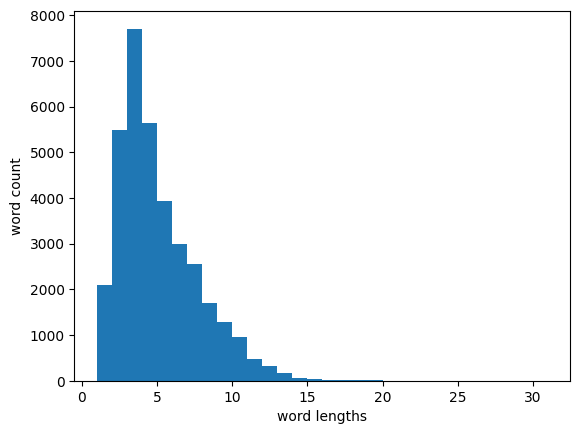

In [22]:
wordlengths = np.zeros(len(words))

for wordi in range(len(words)):
  wordlengths[wordi] = len(words[wordi])

plt.hist(wordlengths, bins=30)
plt.xlabel('word lengths')
plt.ylabel('word count')
plt.show()

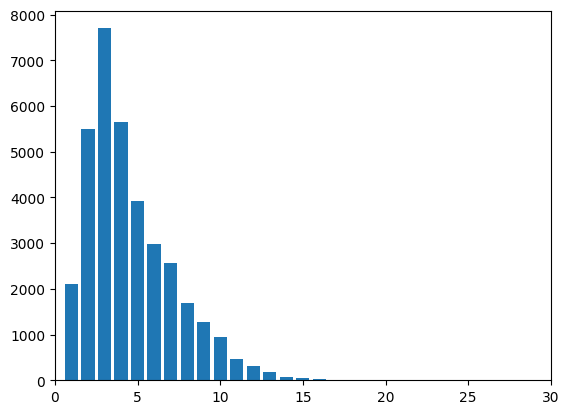

In [26]:
wordcounts = np.zeros(40)

for wrd in words:
  wordcounts[len(wrd)] += 1

plt.bar(range(len(wordcounts)), wordcounts)
plt.show()

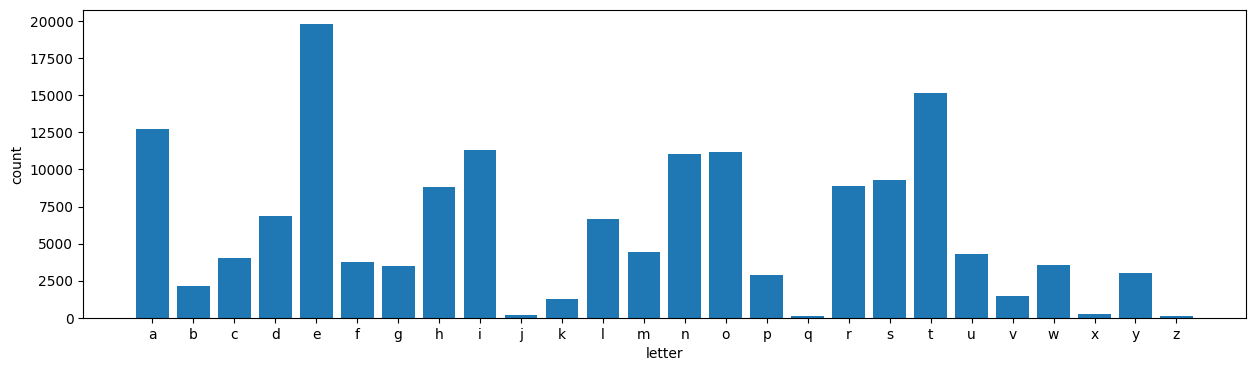

In [39]:
letters = string.ascii_lowercase
numletters = len(letters)
lettercounts = np.zeros(numletters)
n = 0

for i in letters:
  lettercounts[n] = text.lower().count(i)
  n += 1

fig,ax = plt.subplots(1, figsize=(15,4))
ax.bar(range(numletters),lettercounts)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel('letter')
ax.set_ylabel('count')
plt.show()

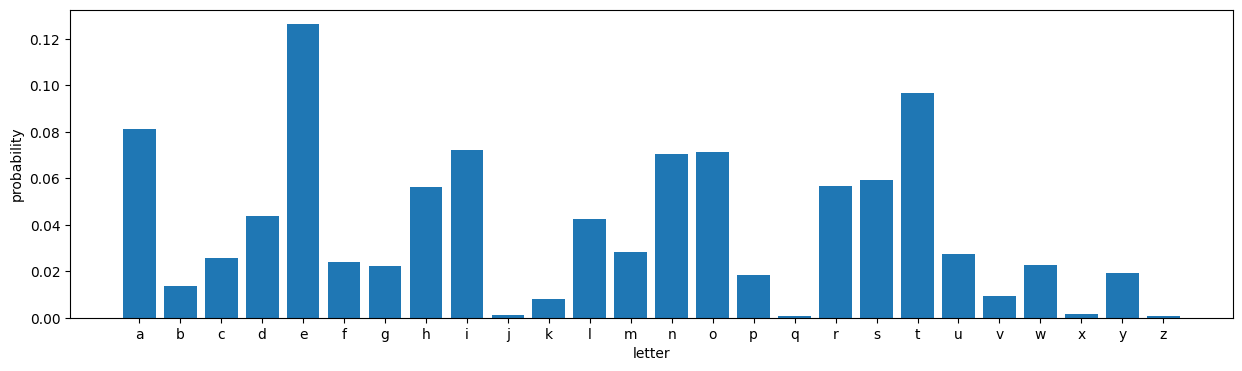

In [41]:
letterprob = lettercounts / sum(lettercounts)

fig,ax = plt.subplots(1, figsize=(15,4))
ax.bar(range(numletters),letterprob)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_xlabel('letter')
ax.set_ylabel('probability')
plt.show()
fig;

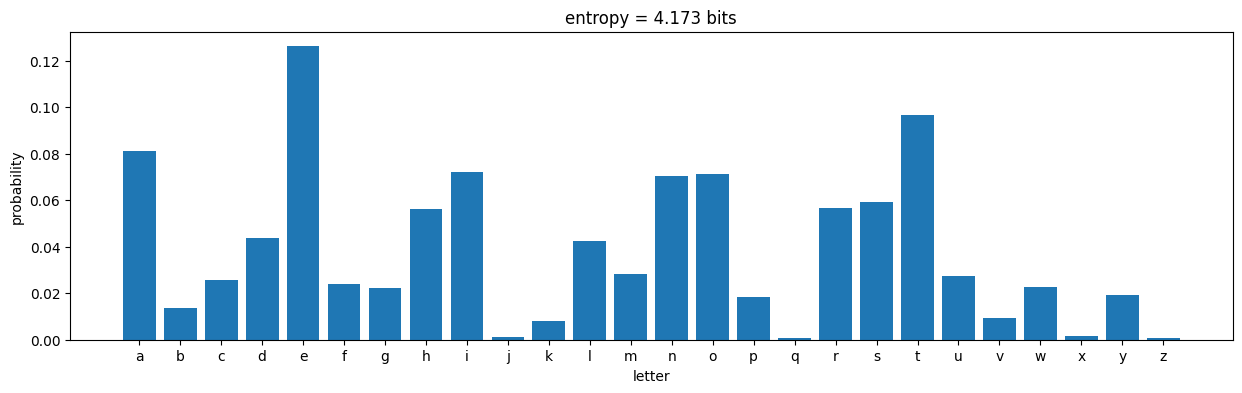

In [46]:
entropy = -sum(letterprob * np.log2(letterprob) + np.finfo(float).eps)
# np.log2(0 + .0000000001) if q didn't exist
# np.log2(o + np.finfo(float).eps)

ax.set_title('entropy = %.3f bits'%entropy)
fig

In [48]:
probmat = np.zeros((numletters, numletters))

for i in range(len(text)-1):
  currlet = text[i]
  nextlet = text[i+1]
  if currlet in letters and nextlet in letters:
    probmat[letters.index(currlet),letters.index(nextlet)] += 1

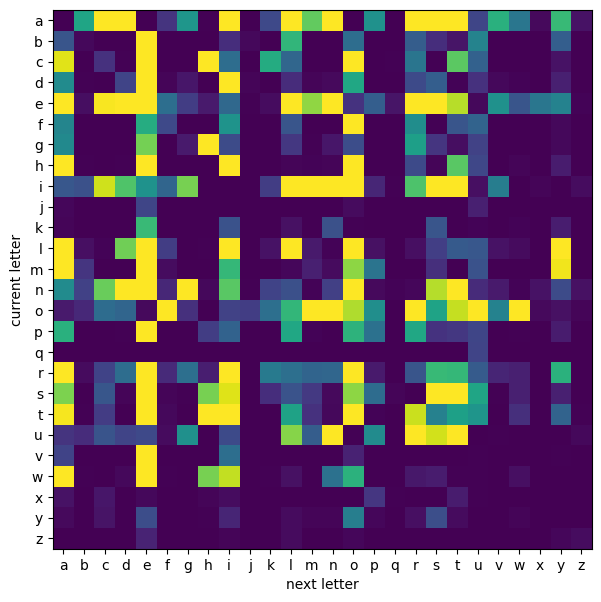

In [58]:
fig,ax = plt.subplots(1, figsize=(7,7))

ax.imshow(probmat, vmax=500)
ax.set_ylabel('current letter')
ax.set_xlabel('next letter')
ax.set_xticks(range(numletters))
ax.set_yticks(range(numletters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
plt.show()

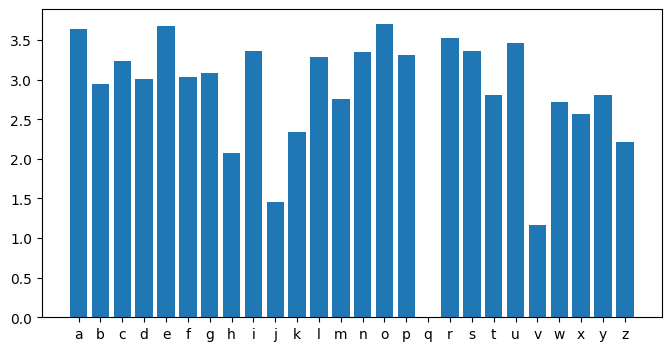

In [65]:
condentr = np. zeros(numletters)

for i in range(numletters):
  probs = probmat[i,:]
  probs = probs / sum(probs)
  condentr[i] = -sum( probs*np.log2(probs + np.finfo(float).eps))

fig,ax = plt.subplots(1, figsize=(8,4))
ax.bar(range(numletters),condentr)
ax.set_xticks(range(numletters))
ax.set_xticklabels(letters)
plt.show()

### Bonus

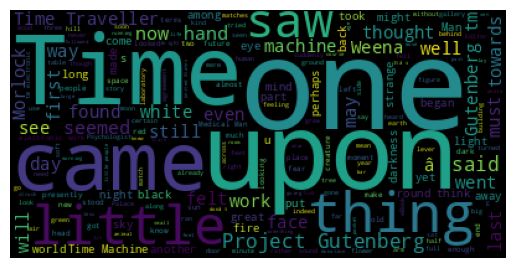

In [66]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()